#### Part 1 : Collecting the Data ####

In [7]:
#Importing the necessary modules 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as matplot
import seaborn as sns
%matplotlib inline

In [8]:
# Read the analytics csv file and store our dataset into a dataframe called "df"
df = pd.read_csv('Employee-turnover.csv')

#### Part 2: Scrubbing the Data ####

In [9]:
#Check to see if there are any missing values in our data set
df.isnull().any()

Employee Count                False
Employee ID                   False
Department                    False
Job Role                      False
Gender                        False
Age                           False
Marital Status                False
Education                     False
Education Field               False
Business Travel               False
Distance From Home (kms)      False
Job Involvement               False
Job Level                     False
Job Satisfaction              False
Monthly Income (USD)          False
Salary Hike (%)               False
Stock Option Level            False
Over Time                     False
No. of Companies Worked       False
Total Working Years           False
Years At Company              False
Years In Current Role         False
Years Since Last Promotion    False
Years With Curr Manager       False
Environment Satisfaction      False
Training Times Last Year      False
Work Life Balance             False
Relationship Satisfaction   

In [10]:
#Get a quick overview of what we are dealing with in our dataset
df.head()

,Employee Count,Employee ID,Department,Job Role,Gender,Age,Marital Status,Education,Education Field,Business Travel,...,Total Working Years,Years At Company,Years In Current Role,Years Since Last Promotion,Years With Curr Manager,Environment Satisfaction,Training Times Last Year,Work Life Balance,Relationship Satisfaction,Attrition (Yes/No)
0,1,1,Sales,Sales Executive,Female,41,Single,College,Life Sciences,Travel_Rarely,...,8,6,4,0,5,Medium,0,Bad,Low,Yes
1,1,2,Research & Development,Research Scientist,Male,49,Married,Below College,Life Sciences,Travel_Frequently,...,10,10,7,1,7,High,3,Better,Very High,No
2,1,4,Research & Development,Laboratory Technician,Male,37,Single,College,Other,Travel_Rarely,...,7,0,0,0,0,Low,3,Bad,Medium,Yes
3,1,5,Research & Development,Research Scientist,Female,33,Married,Master,Life Sciences,Travel_Frequently,...,8,8,7,3,0,Very High,3,Better,High,No
4,1,7,Research & Development,Laboratory Technician,Male,27,Married,Below College,Medical,Travel_Rarely,...,6,2,2,2,2,Low,3,Better,Very High,No


In [11]:
#Move the response variable "Attrition"to the front of the table
front = df['Attrition (Yes/No)']
df.drop(labels=['Attrition (Yes/No)'], axis=1,inplace = True)
df.insert(0, 'Attrition (Yes/No)', front)
df.head()

,Attrition (Yes/No),Employee Count,Employee ID,Department,Job Role,Gender,Age,Marital Status,Education,Education Field,...,No. of Companies Worked,Total Working Years,Years At Company,Years In Current Role,Years Since Last Promotion,Years With Curr Manager,Environment Satisfaction,Training Times Last Year,Work Life Balance,Relationship Satisfaction
0,Yes,1,1,Sales,Sales Executive,Female,41,Single,College,Life Sciences,...,2,8,6,4,0,5,Medium,0,Bad,Low
1,No,1,2,Research & Development,Research Scientist,Male,49,Married,Below College,Life Sciences,...,1,10,10,7,1,7,High,3,Better,Very High
2,Yes,1,4,Research & Development,Laboratory Technician,Male,37,Single,College,Other,...,6,7,0,0,0,0,Low,3,Bad,Medium
3,No,1,5,Research & Development,Research Scientist,Female,33,Married,Master,Life Sciences,...,1,8,8,7,3,0,Very High,3,Better,High
4,No,1,7,Research & Development,Laboratory Technician,Male,27,Married,Below College,Medical,...,9,6,2,2,2,2,Low,3,Better,Very High


#### Part 3: Exploring the Data ####

##### 3a Statistical Overview #####

In [12]:
df.shape

(1470, 29)

The datasets contains 29 columns/features and 1470 observations

In [13]:
# Check the type of our features
df.dtypes

Attrition (Yes/No)            object
Employee Count                 int64
Employee ID                    int64
Department                    object
Job Role                      object
Gender                        object
Age                            int64
Marital Status                object
Education                     object
Education Field               object
Business Travel               object
Distance From Home (kms)       int64
Job Involvement               object
Job Level                      int64
Job Satisfaction              object
Monthly Income (USD)           int64
Salary Hike (%)                int64
Stock Option Level             int64
Over Time                     object
No. of Companies Worked        int64
Total Working Years            int64
Years At Company               int64
Years In Current Role          int64
Years Since Last Promotion     int64
Years With Curr Manager        int64
Environment Satisfaction      object
Training Times Last Year       int64
W

In [14]:
#Checking the uniques values of object type columns 
print(df["Department"].unique())
print(df["Work Life Balance"].unique())
print(df["Environment Satisfaction"].unique())
print(df["Job Role"].unique())
print(df["Marital Status"].unique())
print(df["Education"].unique())
print(df["Education Field"].unique())
print(df["Business Travel"].unique())

['Sales' 'Research & Development' 'Human Resources']
['Bad' 'Better' 'Good' 'Best']
['Medium' 'High' 'Low' 'Very High']
['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']
['Single' 'Married' 'Divorced']
['College' 'Below College' 'Master' 'Bachelor' 'Doctor']
['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']


In [15]:
# Replacing them to numeric values
df.replace(('Yes', 'No'), (1, 0), inplace=True)
df.replace(('Bad', 'Good', 'Better', 'Best'), (0, 0.5, 0.75, 1), inplace=True)
df.replace(('Low', 'Medium', 'High', 'Very High'), (0, 0.5, 0.75, 1), inplace=True)
df.replace(('Male', 'Female'), (0, 1), inplace=True)
df.replace(('Travel_Rarely', 'Travel_Frequently', 'Non-Travel'), (0, 1, 2), inplace=True)
df.replace(('Sales', 'Research & Development', 'Human Resources'), (1, 2, 3), inplace=True)
df.replace(('Sales Executive', 'Research Scientist', 'Laboratory Technician', 'Manufacturing Director', 'Healthcare Representative', 'Manager', 'Sales Representative', 'Research Director', 'Human Resources'), (1, 2, 3, 4, 5, 6, 7, 8, 9), inplace=True)
df.replace(('Single', 'Married', 'Divorced'), (0, 1, 2), inplace=True)
df.replace(('Below College', 'College', 'Bachelor', 'Doctor', 'Master'), (0, 1, 2, 3, 4), inplace=True)
df.replace(('Life Sciences', 'Medical', 'Marketing', 'Technical Degree', 'Human Resources', 'Other'), (0, 1, 2, 3, 4, 5), inplace=True)
df.dtypes

Attrition (Yes/No)              int64
Employee Count                  int64
Employee ID                     int64
Department                      int64
Job Role                        int64
Gender                          int64
Age                             int64
Marital Status                  int64
Education                       int64
Education Field                 int64
Business Travel                 int64
Distance From Home (kms)        int64
Job Involvement               float64
Job Level                       int64
Job Satisfaction              float64
Monthly Income (USD)            int64
Salary Hike (%)                 int64
Stock Option Level              int64
Over Time                       int64
No. of Companies Worked         int64
Total Working Years             int64
Years At Company                int64
Years In Current Role           int64
Years Since Last Promotion      int64
Years With Curr Manager         int64
Environment Satisfaction      float64
Training Tim

In [16]:
# Display the statisitcal overview of the employees
df.describe()

,Attrition (Yes/No),Employee Count,Employee ID,Department,Job Role,Gender,Age,Marital Status,Education,Education Field,...,No. of Companies Worked,Total Working Years,Years At Company,Years In Current Role,Years Since Last Promotion,Years With Curr Manager,Environment Satisfaction,Training Times Last Year,Work Life Balance,Relationship Satisfaction
count,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.00000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,0.161224,1.0,1024.865306,1.739456,3.340816,0.400000,36.923810,0.902721,2.15102,1.135374,...,2.689116,11.279592,7.008163,4.229252,2.187755,4.123129,0.629762,2.799320,0.624150,0.580612
std,0.367863,0.0,602.024335,0.527792,2.077506,0.490065,9.135373,0.730121,1.32229,1.352219,...,2.494231,7.780782,6.126525,3.623137,3.222430,3.568136,0.356249,1.289271,0.268423,0.365340
min,0.000000,1.0,1.000000,1.000000,1.000000,0.000000,18.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.0,491.250000,1.000000,2.000000,0.000000,30.000000,0.000000,1.00000,0.000000,...,1.000000,6.000000,3.000000,2.000000,0.000000,2.000000,0.500000,2.000000,0.500000,0.500000
50%,0.000000,1.0,1020.500000,2.000000,3.000000,0.000000,36.000000,1.000000,2.00000,1.000000,...,2.000000,10.000000,5.000000,3.000000,1.000000,3.000000,0.750000,3.000000,0.750000,0.750000
75%,0.000000,1.0,1555.750000,2.000000,5.000000,1.000000,43.000000,1.000000,4.00000,2.000000,...,4.000000,15.000000,9.000000,7.000000,3.000000,7.000000,1.000000,3.000000,0.750000,1.000000
max,1.000000,1.0,2068.000000,3.000000,8.000000,1.000000,60.000000,2.000000,4.00000,5.000000,...,9.000000,40.000000,40.000000,18.000000,15.000000,17.000000,1.000000,6.000000,1.000000,1.000000


In [17]:
#Overview of summary 
turnover_Summary = df.groupby('Attrition (Yes/No)')
turnover_Summary.mean()

,Employee Count,Employee ID,Department,Job Role,Gender,Age,Marital Status,Education,Education Field,Business Travel,...,No. of Companies Worked,Total Working Years,Years At Company,Years In Current Role,Years Since Last Promotion,Years With Curr Manager,Environment Satisfaction,Training Times Last Year,Work Life Balance,Relationship Satisfaction
Attrition (Yes/No),,,,,,,,,,,,,,,,,,,,,
0,1.0,1027.656123,1.754258,3.386861,0.406326,37.561233,0.954582,2.167883,1.106245,0.392539,...,2.645580,11.862936,7.369019,4.484185,2.234388,4.367397,0.649838,2.832928,0.681671,0.639092
1,1.0,1010.345992,1.662447,3.101266,0.367089,33.607595,0.632911,2.063291,1.286920,0.392405,...,2.915612,8.244726,5.130802,2.902954,1.945148,2.852321,0.525316,2.624473,0.324895,0.276371


##### 3b. Correlation Matrix & Heatmap #####

,Attrition (Yes/No),Employee Count,Employee ID,Department,Job Role,Gender,Age,Marital Status,Education,Education Field,...,No. of Companies Worked,Total Working Years,Years At Company,Years In Current Role,Years Since Last Promotion,Years With Curr Manager,Environment Satisfaction,Training Times Last Year,Work Life Balance,Relationship Satisfaction
Attrition (Yes/No),1.000000,NaN,-0.010577,-0.063991,-0.050570,-0.029453,-0.159205,-0.162070,-0.029098,0.049152,...,0.039826,-0.171063,-0.134392,-0.160545,-0.033019,-0.156199,-0.128581,-0.059478,-0.488948,-0.365225
Employee Count,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Employee ID,-0.010577,NaN,1.000000,0.010895,-0.018576,-0.022556,-0.010145,0.008155,0.042618,0.013511,...,0.001532,-0.014365,-0.011240,-0.008416,-0.009019,-0.009197,0.022840,0.023603,0.044944,-0.053534
Department,-0.063991,NaN,0.010895,1.000000,0.231280,-0.041583,0.031882,0.056073,-0.015762,-0.025898,...,0.038230,0.015762,-0.022920,-0.056315,-0.040061,-0.034282,0.018822,-0.036875,0.007445,0.039273
Job Role,-0.050570,NaN,-0.018576,0.231280,1.000000,0.035838,0.194591,0.031746,-0.023705,-0.043575,...,0.039247,0.337825,0.169164,0.082402,0.105236,0.070188,-0.002999,0.015895,0.019594,0.001447
Gender,-0.029453,NaN,-0.022556,-0.041583,0.035838,1.000000,0.036311,-0.047183,0.004412,-0.014998,...,0.037202,0.046881,0.029747,0.041483,0.026985,0.030599,0.005654,0.038787,0.006469,-0.009125
Age,-0.159205,NaN,-0.010145,0.031882,0.194591,0.036311,1.000000,0.095029,0.205969,-0.036858,...,0.299358,0.680381,0.311309,0.212901,0.216513,0.202089,0.006125,-0.019621,0.056259,0.065733
Marital Status,-0.162070,NaN,0.008155,0.056073,0.031746,-0.047183,0.095029,1.000000,-0.000285,0.008521,...,0.037584,0.077886,0.059986,0.065822,0.030915,0.038570,0.011269,-0.010629,0.095532,0.015383
Education,-0.029098,NaN,0.042618,-0.015762,-0.023705,0.004412,0.205969,-0.000285,1.000000,0.035387,...,0.129624,0.136361,0.066568,0.053299,0.048458,0.065600,-0.037655,-0.036117,0.034885,0.018818
Education Field,0.049152,NaN,0.013511,-0.025898,-0.043575,-0.014998,-0.036858,0.008521,0.035387,1.000000,...,-0.009110,-0.028898,-0.022730,-0.013425,-0.027865,-0.007690,0.058188,-0.001978,0.004303,-0.013837


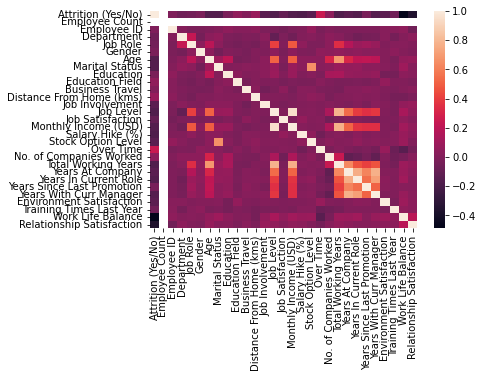

In [18]:
#Correlation Matrix
corr = df.corr()
corr = (corr)
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
corr

Since "Work Life Balance" has the highest correlation with our dependent variable Attrition.

#### Feature Importance ####

Summary:

By using a decision tree classifier, it could rank the features used for the prediction. 

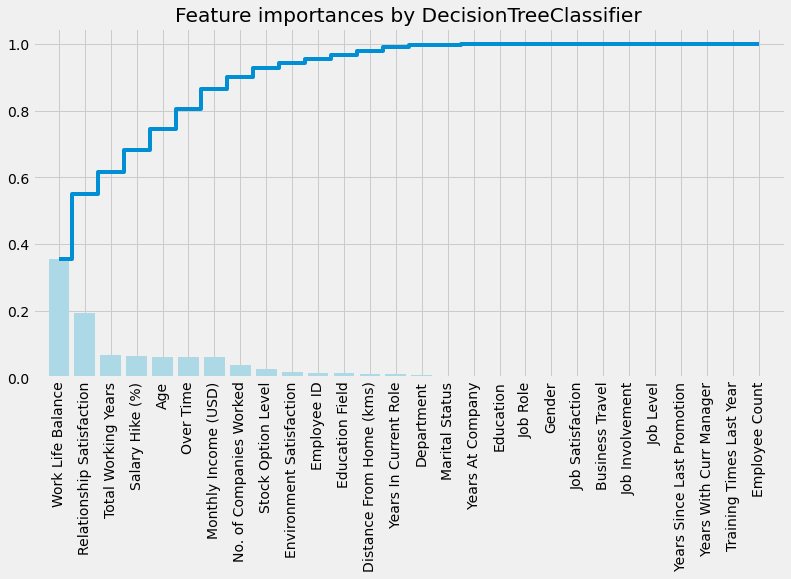

In [19]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (12,6)


# Convert these variables into categorical variables
df["Department"] = df["Department"].astype('category').cat.codes
df["Job Role"] = df["Job Role"].astype('category').cat.codes
df["Marital Status"] = df["Marital Status"].astype('category').cat.codes
df["Education"] = df["Education"].astype('category').cat.codes
df["Education Field"] = df["Education Field"].astype('category').cat.codes

# Create train and test splits
target_name = 'Attrition (Yes/No)'
X = df.drop('Attrition (Yes/No)', axis=1)


y=df[target_name]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.15, random_state=123, stratify=y)

dtree = tree.DecisionTreeClassifier(
    #max_depth=3,
    class_weight="balanced",
    min_weight_fraction_leaf=0.01
    )
dtree = dtree.fit(X_train,y_train)

## plot the importances ##
importances = dtree.feature_importances_
feat_names = df.drop(['Attrition (Yes/No)'],axis=1).columns


indices = np.argsort(importances)[::-1]
plt.figure(figsize=(12,6))
plt.title("Feature importances by DecisionTreeClassifier")
plt.bar(range(len(indices)), importances[indices], color='lightblue',  align="center")
plt.step(range(len(indices)), np.cumsum(importances[indices]), where='mid', label='Cumulative')
plt.xticks(range(len(indices)), feat_names[indices], rotation='vertical',fontsize=14)
plt.xlim([-1, len(indices)])
plt.show()

Top 4 Features:
1) Work Life Balance
2) Relationship Satisfication
3) Total Working Years
4) Salary Hike (%)

This is helpful in creating our model for logistic regression because it’ll be more interpretable to understand what goes into our model when we utilize less features.

##### 4a Modeling the Data : Logistic Regression Analysis #####

NOTE: This will be an in-depth analysis of using logistic regression as a classifier. I do go over other types of models in the other section below this. This is more of a use-case example of what can be done and explained to management in a company.

Logistic Regression commonly deals with the issue of how likely an observation is to belong to each group. This model is commonly used to predict the likelihood of an event occurring. In contrast to linear regression, the output of logistic regression is transformed with a logit function. This makes the output either 0 or 1. This is a useful model to take advantage of for this problem because we are interested in predicting whether an employee will leave (0) or stay (1).

Another reason for why logistic regression is the preferred model of choice is because of its interpretability. Logistic regression predicts the outcome of the response variable (turnover) through a set of other explanatory variables, also called predictors. In context of this domain, the value of our response variable is categorized into two forms: 0 (zero) or 1 (one). The value of 0 (zero) represents the probability of an employee not leaving the company and the value of 1 (one) represents the probability of an employee leaving the company.

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, confusion_matrix, precision_recall_curve
from sklearn.preprocessing import RobustScaler



# Create an intercept term for the logistic regression equation
df['int'] = 1
indep_var = ['Work Life Balance', 'Relationship Satisfaction', 'Total Working Years', 'Salary Hike (%)',  'int', 'Attrition (Yes/No)']
df = df[indep_var]

# Create train and test splits
target_name = 'Attrition (Yes/No)'
X = df.drop('Attrition (Yes/No)', axis=1)

y=df[target_name]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.15, random_state=123, stratify=y)

X_train.head()

,Work Life Balance,Relationship Satisfaction,Total Working Years,Salary Hike (%),int
639,0.75,0.5,7,16,1
1019,0.50,0.0,11,13,1
1389,0.75,0.5,10,21,1
1392,0.75,1.0,10,11,1
1347,0.50,1.0,10,21,1


Using Logistic Regression Coefficient

In [21]:
import statsmodels.api as sm
import pandas as pd

df=pd.read_csv('Employee-turnover.csv')

df.replace(('Yes', 'No'), (1, 0), inplace=True)
df.replace(('Bad', 'Good', 'Better', 'Best'), (0, 0.5, 0.75, 1), inplace=True)
df.replace(('Low', 'Medium', 'High', 'Very High'), (0, 0.5, 0.75, 1), inplace=True)
df.replace(('Male', 'Female'), (0, 1), inplace=True)
df.replace(('Travel_Rarely', 'Travel_Frequently', 'Non-Travel'), (0, 1, 2), inplace=True)
df.replace(('Sales', 'Research & Development', 'Human Resources'), (1, 2, 3), inplace=True)
df.replace(('Sales Executive', 'Research Scientist', 'Laboratory Technician', 'Manufacturing Director', 'Healthcare Representative', 'Manager', 'Sales Representative', 'Research Director', 'Human Resources'), (1, 2, 3, 4, 5, 6, 7, 8, 9), inplace=True)
df.replace(('Single', 'Married', 'Divorced'), (0, 1, 2), inplace=True)
df.replace(('Below College', 'College', 'Bachelor', 'Doctor', 'Master'), (0, 1, 2, 3, 4), inplace=True)
df.replace(('Life Sciences', 'Medical', 'Marketing', 'Technical Degree', 'Human Resources', 'Other'), (0, 1, 2, 3, 4, 5), inplace=True)

df['int'] = 1
import statsmodels.api as sm

Xtrain = df[['Work Life Balance', 'Relationship Satisfaction', 'Total Working Years', 'Salary Hike (%)', 'int']]
ytrain = df[['Attrition (Yes/No)']]

log_reg = sm.Logit(ytrain, Xtrain).fit()
log_reg.summary
log_reg.params

Optimization terminated successfully.
         Current function value: 0.266139
         Iterations 8


Work Life Balance           -4.214589
Relationship Satisfaction   -2.860926
Total Working Years         -0.077157
Salary Hike (%)             -0.205414
int                          5.579776
dtype: float64

With the elimination of the other variables, I’ll be using the four most important features to create our model: Work Life Balance, Relationship Satisfication, Total Working Years, Salary Hike(%).
Following overall equation was developed:
Employee Turnover Score = Work Life Balance(-4.214589) + Relationship Satisfication(-2.860926) + Total Working Years(-0.077157) + Salary Hike(%) (-0.205414) + 0.181896
The values above are the coefficient assigned to each independent variable. The constant 5.579776 represents the effect of all uncontrollable variables.

In [22]:
# Create function to compute coefficients
coef = log_reg.params
def y (coef, workbalance, relationship, workingyears, salaryhike) : 
    return coef[4] + coef[0]*workbalance + coef[1]*relationship + coef[2]*workingyears + coef[3]*salaryhike

import numpy as np

# An Employee with better Work Life Balance and medium Relationship Satisfication and worked 5 years and 15% Salary Hike has a 7% chance of turnover
y1 = y(coef, 0.75, 0.5, 5, 15)
p = np.exp(y1) / (1+np.exp(y1))
p

0.07737090922567529

An Employee with better Work Life Balance and medium Relationship Satisfication and worked 5 years and 15% Salary Hike has a 7% chance of turnover

Using other models

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, confusion_matrix, precision_recall_curve
from sklearn.preprocessing import RobustScaler

In [24]:
# Create base rate model
def base_rate_model(X) :
    y = np.zeros(X.shape[0])
    return y

In [25]:
# Create train and test splits
target_name = 'Attrition (Yes/No)'
X = df.drop('Attrition (Yes/No)', axis=1)
#robust_scaler = RobustScaler()
#X = robust_scaler.fit_transform(X)
y=df[target_name]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.15, random_state=123, stratify=y)

In [26]:
# Check accuracy of base rate model
y_base_rate = base_rate_model(X_test)
from sklearn.metrics import accuracy_score
print ("Base rate accuracy is %2.2f" % accuracy_score(y_test, y_base_rate))

Base rate accuracy is 0.84


In [27]:
# Check accuracy of Logistic Model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(penalty='l2', C=1)

model.fit(X_train, y_train)
print ("Logistic accuracy is %2.2f" % accuracy_score(y_test, model.predict(X_test)))

Logistic accuracy is 0.85


C:\Users\Pratik Parihar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression V.S. Random Forest V.S. Decision Tree V.S. AdaBoost Model

In [28]:
# Compare the Logistic Regression Model V.S. Base Rate Model V.S. Random Forest Model
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier


print ("---Base Model---")
base_roc_auc = roc_auc_score(y_test, base_rate_model(X_test))
print ("Base Rate AUC = %2.2f" % base_roc_auc)
print(classification_report(y_test, base_rate_model(X_test)))

# NOTE: By adding in "class_weight = balanced", the Logistic Auc increased by about 10%! This adjusts the threshold value
logis = LogisticRegression(class_weight = "balanced")
logis.fit(X_train, y_train)
print ("\n\n ---Logistic Model---")
logit_roc_auc = roc_auc_score(y_test, logis.predict(X_test))
print ("Logistic AUC = %2.2f" % logit_roc_auc)
print(classification_report(y_test, logis.predict(X_test)))

# Decision Tree Model
dtree = tree.DecisionTreeClassifier(
    #max_depth=3,
    class_weight="balanced",
    min_weight_fraction_leaf=0.01
    )
dtree = dtree.fit(X_train,y_train)
print ("\n\n ---Decision Tree Model---")
dt_roc_auc = roc_auc_score(y_test, dtree.predict(X_test))
print ("Decision Tree AUC = %2.2f" % dt_roc_auc)
print(classification_report(y_test, dtree.predict(X_test)))

# Random Forest Model
rf = RandomForestClassifier(
    n_estimators=1000, 
    max_depth=None, 
    min_samples_split=10, 
    class_weight="balanced"
    #min_weight_fraction_leaf=0.02 
    )
rf.fit(X_train, y_train)
print ("\n\n ---Random Forest Model---")
rf_roc_auc = roc_auc_score(y_test, rf.predict(X_test))
print ("Random Forest AUC = %2.2f" % rf_roc_auc)
print(classification_report(y_test, rf.predict(X_test)))


# Ada Boost
ada = AdaBoostClassifier(n_estimators=400, learning_rate=0.1)
ada.fit(X_train,y_train)
print ("\n\n ---AdaBoost Model---")
ada_roc_auc = roc_auc_score(y_test, ada.predict(X_test))
print ("AdaBoost AUC = %2.2f" % ada_roc_auc)
print(classification_report(y_test, ada.predict(X_test)))

---Base Model---
Base Rate AUC = 0.50
              precision    recall  f1-score   support

           0       0.84      1.00      0.91       185
           1       0.00      0.00      0.00        36

    accuracy                           0.84       221
   macro avg       0.42      0.50      0.46       221
weighted avg       0.70      0.84      0.76       221



 ---Logistic Model---
Logistic AUC = 0.65
              precision    recall  f1-score   support

           0       0.90      0.72      0.80       185
           1       0.29      0.58      0.39        36

    accuracy                           0.70       221
   macro avg       0.59      0.65      0.59       221
weighted avg       0.80      0.70      0.73       221



 ---Decision Tree Model---
Decision Tree AUC = 0.81
              precision    recall  f1-score   support

           0       0.95      0.87      0.91       185
           1       0.53      0.75      0.62        36

    accuracy                           0.85   

C:\Users\Pratik Parihar\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Pratik Parihar\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Pratik Parihar\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Pratik Parihar\anac



 ---Random Forest Model---
Random Forest AUC = 0.78
              precision    recall  f1-score   support

           0       0.92      0.98      0.95       185
           1       0.84      0.58      0.69        36

    accuracy                           0.91       221
   macro avg       0.88      0.78      0.82       221
weighted avg       0.91      0.91      0.91       221



 ---AdaBoost Model---
AdaBoost AUC = 0.81
              precision    recall  f1-score   support

           0       0.93      0.98      0.96       185
           1       0.85      0.64      0.73        36

    accuracy                           0.92       221
   macro avg       0.89      0.81      0.84       221
weighted avg       0.92      0.92      0.92       221



#### ROC GRAPH ####

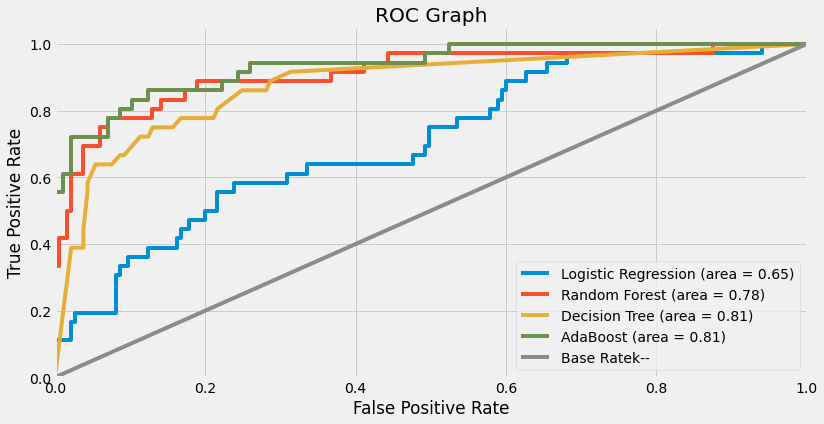

In [29]:
# Create ROC Graph
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, logis.predict_proba(X_test)[:,1])
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
dt_fpr, dt_tpr, dt_thresholds = roc_curve(y_test, dtree.predict_proba(X_test)[:,1])
ada_fpr, ada_tpr, ada_thresholds = roc_curve(y_test, ada.predict_proba(X_test)[:,1])

plt.figure()

# Plot Logistic Regression ROC
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)

# Plot Random Forest ROC
plt.plot(rf_fpr, rf_tpr, label='Random Forest (area = %0.2f)' % rf_roc_auc)

# Plot Decision Tree ROC
plt.plot(dt_fpr, dt_tpr, label='Decision Tree (area = %0.2f)' % dt_roc_auc)

# Plot AdaBoost ROC
plt.plot(ada_fpr, ada_tpr, label='AdaBoost (area = %0.2f)' % ada_roc_auc)

# Plot Base Rate ROC
plt.plot([0,1], [0,1],label='Base Rate' 'k--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Graph')
plt.legend(loc="lower right")
plt.show()

#### Decision Tree has Maximum Accuracy ####